# Import Libraries

In [4]:
import numpy as np
import pandas as pd 
import time 
import re

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
english_stop_words = stopwords.words('english')
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# machine learning

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC


from sklearn.metrics import classification_report

import seaborn as sns
sns.set(style ='whitegrid')
pd.set_option('display.max_columns',None)


In [5]:
headers=['Tweet_ID','Entity','Sentiment','Tweet_content']


train_df=pd.read_csv('twitter_training.csv', sep=',', names=headers)

valid_df=pd.read_csv('twitter_validation.csv', sep=',', names=headers)

# Exploratory Data Analysis

In [6]:
train_df.sample(5)

,Tweet_ID,Entity,Sentiment,Tweet_content
16675,9657,PlayStation5(PS5),Negative,I think that this behavior of the PS5 casts a ...
8475,9454,Overwatch,Negative,Nerd Tweet: I’m getting really disappointed wi...
10355,12982,Xbox(Xseries),Irrelevant,Casual reminder both cards and the nvidia grap...
64600,7866,MaddenNFL,Negative,@EAMaddenNFL how do you guys manage to make it...
33028,6467,Fortnite,Positive,Fortnite is literally freaking unmatched for i...


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   Entity         74682 non-null  object
 2   Sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [8]:
train_df['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

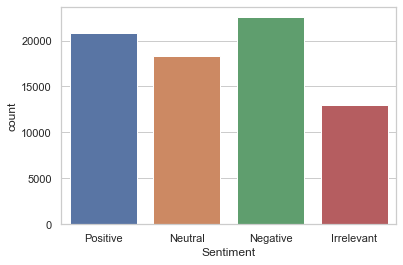

In [9]:
sns.countplot(x=train_df['Sentiment'])

In [10]:
train_df.duplicated().sum()

2700

In [11]:
train_df= train_df.drop_duplicates()

<AxesSubplot:ylabel='Sentiment'>

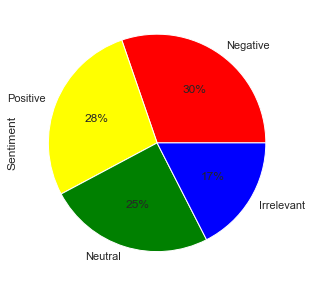

In [12]:
train_df.Sentiment.value_counts().plot(kind='pie', autopct='%1.0f%%',figsize=(5,5),colors=["red", "yellow", "green",'blue'])


<AxesSubplot:xlabel='Entity'>

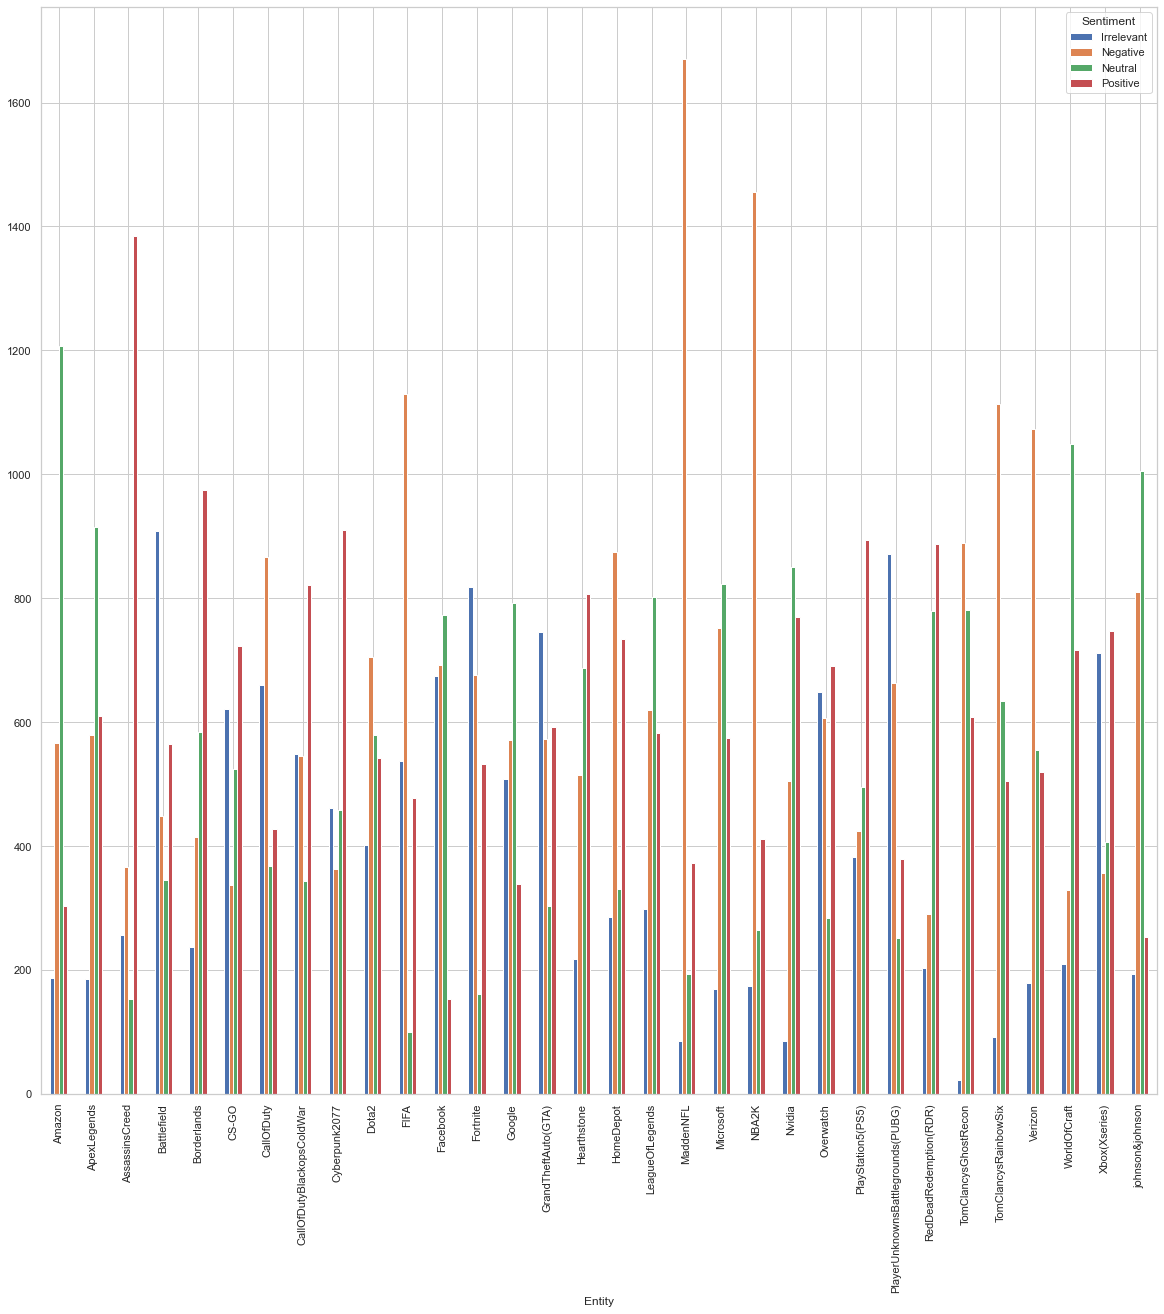

In [13]:
Twitter_sentiment = train_df.groupby(['Entity', 'Sentiment']).Sentiment.count().unstack()
Twitter_sentiment.plot(kind='bar',figsize=(20,20))

# Data Cleaning

In [14]:
# encoder for target feature
from sklearn import preprocessing
lb = preprocessing.LabelEncoder()
train_df['Sentiment']=lb.fit_transform(train_df['Sentiment'])

In [15]:
train_df['Tweet_content'].isnull().sum()

326

In [16]:
train_df.dropna(axis=0, inplace=True)

In [17]:
tweet_train  = train_df["Tweet_content"]
tweet_valid=valid_df["Tweet_content"]
target=train_df['Sentiment']

# Step (1): Remove Additional Letter such as @

In [18]:
REPLACE_WITH_SPACE = re.compile("(@)")
SPACE = " "

def preprocess_reviews(reviews):  
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line.lower()) for line in reviews]
    
    return reviews

reviews_train_clean = preprocess_reviews(tweet_train)
reviews_valid_clean = preprocess_reviews(tweet_valid)

# Step (2): Remove Stop Words

In [19]:
def remove_stop_words(corpus):
    removed_stop_words = []
    for review in corpus:
        removed_stop_words.append(
            ' '.join([word for word in review.split()  if word not in english_stop_words]))
    return removed_stop_words

no_stop_words_train = remove_stop_words(reviews_train_clean)
no_stop_words_valid = remove_stop_words(reviews_valid_clean)

# Step(3) : Stemming

In [20]:

def get_stemmed_text(corpus):
    stemmer = PorterStemmer()

    return [' '.join([stemmer.stem(word) for word in review.split()]) for review in corpus]

stemmed_reviews_train = get_stemmed_text(no_stop_words_train)
stemmed_reviews_test = get_stemmed_text(no_stop_words_valid)

# Step(4) : TF-IDF

In [21]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_vectorizer.fit(stemmed_reviews_train)
X = tfidf_vectorizer.transform(stemmed_reviews_train)
X_test = tfidf_vectorizer.transform(stemmed_reviews_test)



# Step(5) : Spliting Data 

In [22]:
X_train, X_val, y_train, y_val = train_test_split(X, target, train_size = 0.75)

# Step(6) : Machine Learing Model

In [ ]:
text_classifier = RandomForestClassifier(n_estimators=500, random_state=0)
text_classifier.fit(X_train, y_train)

y_pred=text_classifier.predict(X_val)
print(classification_report(y_val,y_pred))